In [1]:

# python
import sys
import os
import importlib
from coffea import processor
# columnar analysis
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak   #numpy like module for handling arrays

# local
sys.path.insert(1, os.path.join(sys.path[0], '../../../')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)  #why do we need this?
importlib.reload(sidm_processor) 
importlib.reload(utilities)
from sidm.tools.utilities import dR, lxy, matched, plot_ratio
#from sidm.definitions.objects import derived_objs, primary_objs

# plotting
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import hist
utilities.set_plot_style()
#%matplotlib inline

In [2]:
samples = [
    '2Mu2E_500GeV_5p0GeV_80p0mm',
]
fileset = utilities.make_fileset(samples, 
                                 "llpNanoAOD_v2_merged", 
                                 location_cfg="signal_v6.yaml"
                                )
                                
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
)

channels = ["baseNoLj", 
            "baseNoLj_A_ee_matched_lj",
            "baseNoLj_A_mumu_matched_lj",
            #"base",
           ]
p = sidm_processor.SidmProcessor(
    channels,
    ["base_plus_gen"],
    #lj_reco_choices=["0.4"],
    #llpnanoaod=True,
)

output = runner.run(fileset, treename="Events", processor_instance=p)


Output()

Output()

Not applying any obj cuts after LJ clustering for channel baseNoLj

Not applying any obj cuts after lj clustering for channel  baseNoLj

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


In [3]:
ch1 = "baseNoLj"
ch2 = "baseNoLj_A_mumu_matched_lj"
ch3 = "baseNoLj_A_ee_matched_lj"

ch4 = "base"

/home/cms-jovyan/SIDM/sidm/studies/ljRecoEffi_studies/../../../sidm/tools/utilities.py:126: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/studies/ljRecoEffi_studies/../../../sidm/tools/utilities.py:126: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


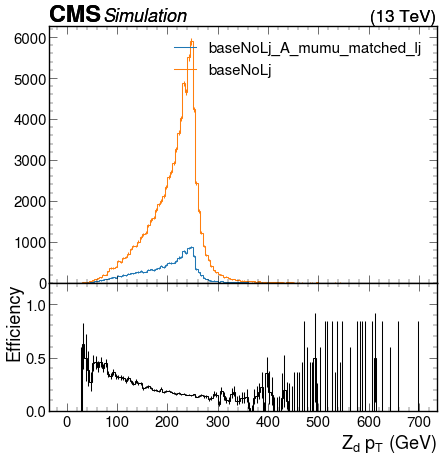

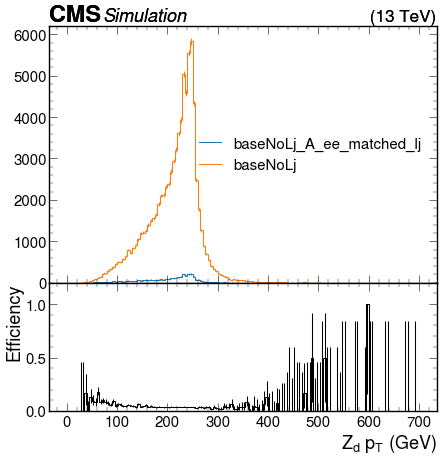

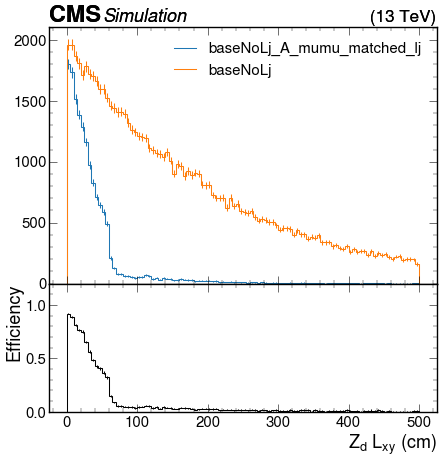

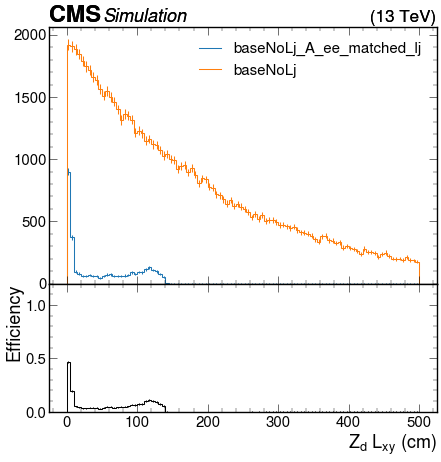

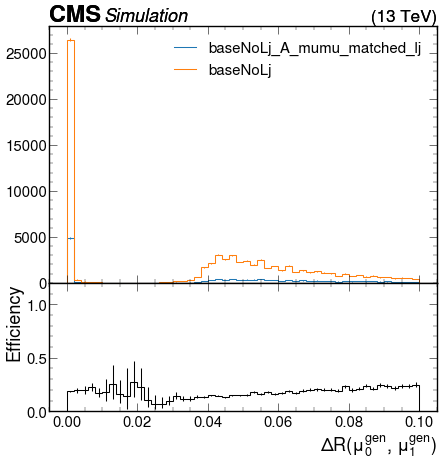

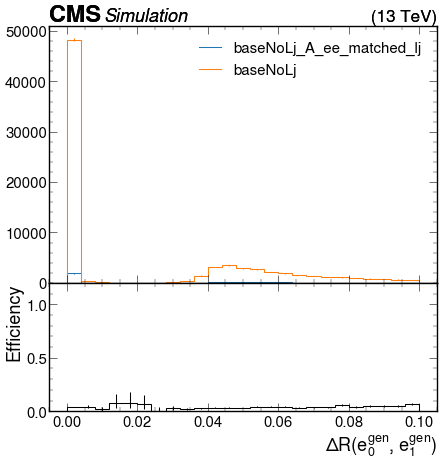

In [4]:
hists = output["out"]["2Mu2E_500GeV_5p0GeV_80p0mm"]["hists"]

utilities.plot_ratio (hists["genAs_toMu_pt_highRange"][ch2, :],
           hists["genAs_toMu_pt_highRange"][ch1, :], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genAs_toE_pt_highRange"][ch3, :],
           hists["genAs_toE_pt_highRange"][ch1, :], 
          legend = [ch3, ch1])
utilities.plot_ratio (hists["genAs_toMu_lxy"][ch2, :],
           hists["genAs_toMu_lxy"][ch1, :], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genAs_toE_lxy"][ch3, :],
           hists["genAs_toE_lxy"][ch1, :], 
          legend = [ch3, ch1])
utilities.plot_ratio (hists["genMu_genMu_dR_XLowRange"][ch2, ::2j],
           hists["genMu_genMu_dR_XLowRange"][ch1, ::2j], 
          legend = [ch2, ch1])
utilities.plot_ratio (hists["genE_genE_dR_XLowRange"][ch3, ::2j],
           hists["genE_genE_dR_XLowRange"][ch1, ::2j], 
          legend = [ch3, ch1])







In [5]:
output["out"]["2Mu2E_500GeV_5p0GeV_80p0mm"]["cutflow"][ch1].print_table(unweighted = False)
output["out"]["2Mu2E_500GeV_5p0GeV_80p0mm"]["cutflow"][ch2].print_table(unweighted = False)
output["out"]["2Mu2E_500GeV_5p0GeV_80p0mm"]["cutflow"][ch3].print_table(unweighted = False)




cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             82029.0      82029.0
PV filter                81416.0      81416.0
cut name                   individual cut N    all cut N
-----------------------  ------------------  -----------
No selection                        82029.0      82029.0
PV filter                           81416.0      81416.0
genAs_toMu_matched_muLj             15229.0      14904.0
cut name                   individual cut N    all cut N
-----------------------  ------------------  -----------
No selection                        82029.0      82029.0
PV filter                           81416.0      81416.0
genAs_toE_matched_egmLj              3288.0       3250.0


In [6]:
hists["genMu_genMu_dR"][ch2, :].sum()

WeightedSum(value=14876, variance=14876)

In [7]:
hists["genE_genE_dR"][ch3, :].sum()

WeightedSum(value=3246, variance=3246)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1f641a31f0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

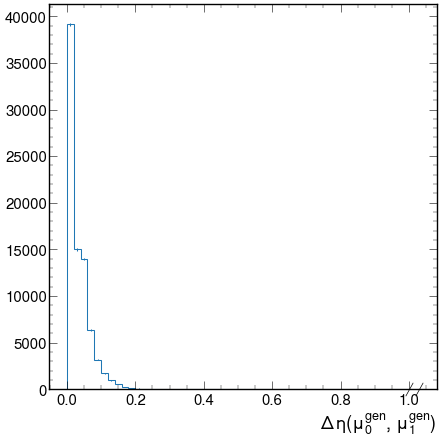

In [8]:
hists["genMu_genMu_dEta"][ch1,:].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1f64612a60>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

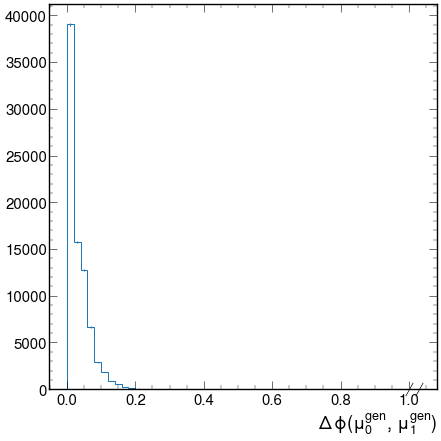

In [9]:
hists["genMu_genMu_dPhi"][ch1,:].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1f643ae6d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

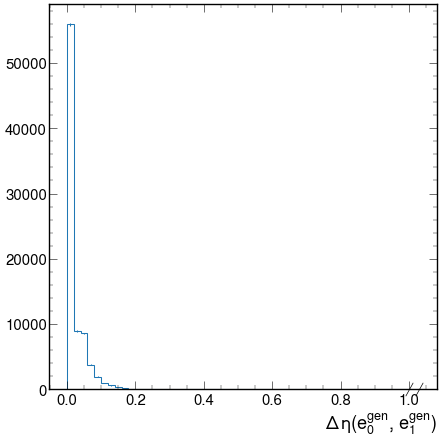

In [10]:
hists["genE_genE_dEta"][ch1,:].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1f4dea26d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

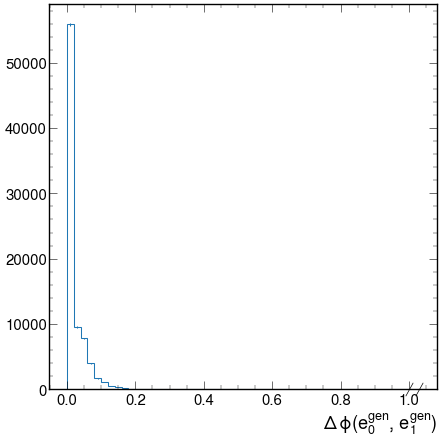

In [11]:
hists["genE_genE_dPhi"][ch1,:].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1f4ddb77c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

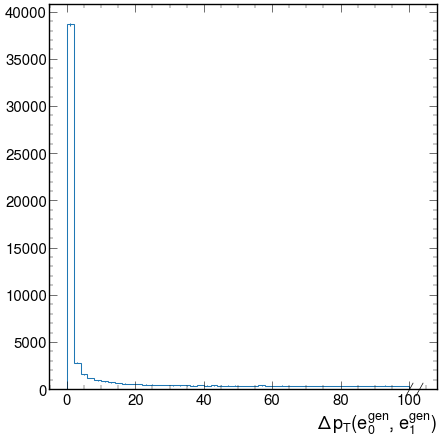

In [12]:
hists["genE_genE_dPt"][ch1,:].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1f4dc39850>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

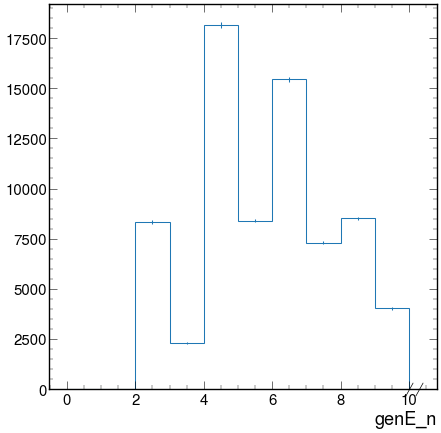

In [13]:
hists["genE_n"][ch1,:].plot()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1f4dafcaf0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

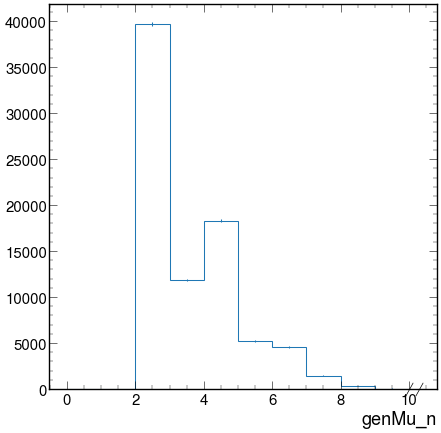

In [14]:
hists["genMu_n"][ch1,:].plot()